In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Removing features that very low in feature importance scale consistently.

In [2]:
df= pd.read_csv('Dataset_A3B_OH_343.csv')

In [3]:
df2=df.iloc[0:69,1:38]
df2 = df2.drop(columns=['M-Enth.atom', 
                        'M-Elec.-ve', 'M-Surface.E', 'M-Group','M-M.P', 
                        
                         'Elec.-ve', 'cova .radii', 'At.radii',
                        'Group',  'Work F.', 'OH_B.E','M-Elec.Aff','M-Work F.', 'M-1st Ion E','M-At No.', 'M-At wt.', 'M-Sp.ht Cap','Sp.ht Cap', 'B.P', 'Elec.Aff','Density',]) 
df2

,M-Density,M-B.P,M-Enth.fus,M-Enth.vap,M-cova .radii,M-At.radii,M-Period,At No.,At wt.,M.P,Enth.fus,Enth.atom,Enth.vap,Surface.E,1st Ion E,Period
0,19.30,3129,12.5,330,136,174,6,28,58.693,1728.00,17.20,431,378,1.92,737.10,4
1,19.30,3129,12.5,330,136,174,6,30,65.380,692.68,7.35,131,119,0.33,906.40,4
2,19.30,3129,12.5,330,136,174,6,44,101.070,2607.00,25.70,652,580,2.60,710.20,5
3,19.30,3129,12.5,330,136,174,6,45,102.910,2237.00,21.70,556,495,1.98,719.70,5
4,19.30,3129,12.5,330,136,174,6,46,106.420,1828.05,16.70,377,380,1.36,804.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,22.56,4701,26.0,560,137,180,6,75,186.210,3459.00,33.00,776,705,2.57,760.00,6
65,22.56,4701,26.0,560,137,180,6,76,190.230,3306.00,31.00,789,630,2.95,840.00,6
66,22.56,4701,26.0,560,137,180,6,78,195.080,2041.40,20.00,565,490,1.49,870.00,6
67,22.56,4701,26.0,560,137,180,6,79,196.960,1337.33,12.50,368,330,0.74,890.13,6


In [4]:
print(df2.columns.tolist())

['M-Density', 'M-B.P', 'M-Enth.fus', 'M-Enth.vap', 'M-cova .radii', 'M-At.radii', 'M-Period', 'At No.', 'At wt.', 'M.P', 'Enth.fus', 'Enth.atom', 'Enth.vap', 'Surface.E', '1st Ion E', 'Period']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [6]:
pca = PCA(n_components=16)  # You can start by setting the number of components equal to the original feature set
pca.fit(X_scaled)

PCA(n_components=16)

In [7]:
X_pca = pca.fit_transform(X_scaled)  # Perform both fitting and transformation

# Retrieve cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

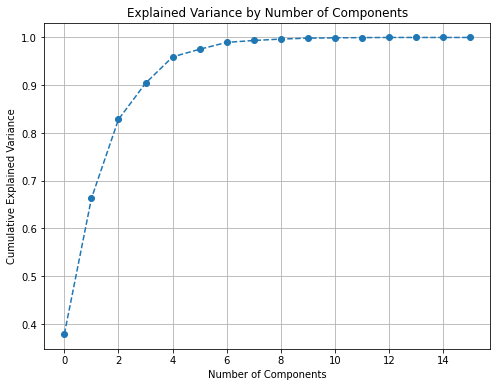

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
# Plotting the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(0, 16), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [9]:
variance_threshold = 0.95
n_components = np.argmax(explained_variance >= variance_threshold) + 1
print(f"Number of components to explain {variance_threshold * 100}% variance: {n_components}")

Number of components to explain 95.0% variance: 5


In [10]:
s = pd.DataFrame(X_scaled)
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.268391,-1.091952,-1.487634,-1.371946,0.043781,0.098959,0.634381,-1.080193,-1.099384,-0.096082,-0.028249,-0.117547,-0.130462,0.276972,-0.176862,-1.234456
1,0.268391,-1.091952,-1.487634,-1.371946,0.043781,0.098959,0.634381,-0.983459,-0.979234,-1.371079,-1.251163,-1.792164,-1.822392,-1.447579,1.621545,-1.234456
2,0.268391,-1.091952,-1.487634,-1.371946,0.043781,0.098959,0.634381,-0.306323,-0.337968,0.986408,1.027057,1.116088,1.189113,1.014516,-0.462610,-0.034773
3,0.268391,-1.091952,-1.487634,-1.371946,0.043781,0.098959,0.634381,-0.257957,-0.304907,0.530752,0.530442,0.580210,0.633847,0.342049,-0.361695,-0.034773
4,0.268391,-1.091952,-1.487634,-1.371946,0.043781,0.098959,0.634381,-0.209590,-0.241841,0.027130,-0.090326,-0.418978,-0.117397,-0.330417,0.538039,-0.034773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.895495,0.777336,0.879519,0.749537,0.147950,0.624205,0.634381,1.193049,1.191799,2.035647,1.933379,1.808263,2.005682,0.981977,0.066396,1.164909
65,0.895495,0.777336,0.879519,0.749537,0.147950,0.624205,0.634381,1.241416,1.264029,1.847227,1.685071,1.880829,1.515741,1.394134,0.916204,1.164909
66,0.895495,0.777336,0.879519,0.749537,0.147950,0.624205,0.634381,1.338150,1.351172,0.289871,0.319381,0.630449,0.601184,-0.189416,1.234882,1.164909
67,0.895495,0.777336,0.879519,0.749537,0.147950,0.624205,0.634381,1.386517,1.384952,-0.577192,-0.611772,-0.469216,-0.444024,-1.002884,1.448715,1.164909


In [11]:
pca=PCA(n_components=5)

In [12]:
pca.fit(X_scaled)

PCA(n_components=5)

In [13]:
x_pca=pca.transform(X_scaled)

In [14]:
x_pca.shape

(69, 5)

In [15]:
m = pd.DataFrame(x_pca)

In [16]:
m.columns = [f'Component_{i+1}' for i in range(5)]
m

,Component_1,Component_2,Component_3,Component_4,Component_5
0,-1.536771,-0.293397,-1.471446,2.158467,0.416835
1,-3.185514,-2.117362,0.664468,2.377940,-1.628682
2,0.222901,1.918752,-1.433002,2.050061,1.273006
3,-0.400656,1.189477,-0.720028,1.972250,1.050217
4,-1.180032,0.331583,0.246993,2.102887,0.015285
...,...,...,...,...,...
64,4.137994,2.349398,-0.104330,-0.007997,0.695216
65,4.058362,2.337399,0.046624,0.222289,-0.141209
66,2.520342,0.553666,1.831287,0.001254,-0.645689
67,1.383614,-0.773184,2.960284,-0.104557,-1.114511


In [17]:
m.to_csv('PCA_add_5.csv', index=False)

In [18]:
n = 156
new_df = m.iloc[n:]  #Comp_1 and Comp_2 for Cu_Pred
L = pd.DataFrame(new_df)
L

,Component_1,Component_2,Component_3,Component_4,Component_5


In [58]:
L.to_csv('PCA_add_Cu_Pred.csv', index=False)

Positively correlated
